In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
from requests.exceptions import Timeout
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="ea97f40064524f9d812dfdc18ea50b86",
    client_secret="3de672dadbed45b6a26b3d0db682fc1e"))

In [3]:
data = pd.read_csv('playlist_2.csv')

In [4]:
data

,Song ID,Song Name,Artist Name
0,6oEVnWKgPqIEPc53OYDNqG,Could've Been (feat. Bryson Tiller),H.E.R.
1,0Aa3g9EQoPNt6PiKjaUeb7,Every Kind Of Way,H.E.R.
2,29he0Joo5sz2607A6ZBT6H,Come Through (feat. Chris Brown),H.E.R.
3,6MO2bfLHKykUgCChFdw91H,"Slide (Remix) (feat. Pop Smoke, A Boogie Wit d...",H.E.R.
4,3tZs3nVjySLbL320lP4mvs,Focus,H.E.R.
...,...,...,...
23485,14KiXUcR7IDpvAhkTmqCuK,Vaya Con Dios - Digitally Remastered 1998,Tony Orlando & Dawn
23486,0mTvuMDJ3cDj0yw5j2wPEK,Candida,Tony Orlando & Dawn
23487,2asG1uvJTNu9pkTVBDL66A,Mornin' Beautiful,Tony Orlando & Dawn
23488,0o5N7SG61e0EjnPFVx3QbL,Knock Three Times,Tony Orlando & Dawn


In [5]:
data.columns

Index(['Song ID', 'Song Name', 'Artist Name'], dtype='object')

In [6]:
audio_features_list = []

for song_id in data['Song ID']:
    audio_features = sp.audio_features(song_id)
    audio_features_list.append(audio_features)

In [7]:
audio_features_list

[[{'danceability': 0.45,
   'energy': 0.352,
   'key': 1,
   'loudness': -11.733,
   'mode': 0,
   'speechiness': 0.267,
   'acousticness': 0.649,
   'instrumentalness': 3.8e-06,
   'liveness': 0.249,
   'valence': 0.408,
   'tempo': 102.679,
   'type': 'audio_features',
   'id': '6oEVnWKgPqIEPc53OYDNqG',
   'uri': 'spotify:track:6oEVnWKgPqIEPc53OYDNqG',
   'track_href': 'https://api.spotify.com/v1/tracks/6oEVnWKgPqIEPc53OYDNqG',
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6oEVnWKgPqIEPc53OYDNqG',
   'duration_ms': 252747,
   'time_signature': 4}],
 [{'danceability': 0.416,
   'energy': 0.298,
   'key': 7,
   'loudness': -8.499,
   'mode': 1,
   'speechiness': 0.0442,
   'acousticness': 0.635,
   'instrumentalness': 2.16e-06,
   'liveness': 0.136,
   'valence': 0.191,
   'tempo': 95.386,
   'type': 'audio_features',
   'id': '0Aa3g9EQoPNt6PiKjaUeb7',
   'uri': 'spotify:track:0Aa3g9EQoPNt6PiKjaUeb7',
   'track_href': 'https://api.spotify.com/v1/tracks/0Aa3g9EQoPNt6PiKj

In [8]:
playlist_df = pd.json_normalize(audio_features_list)

In [9]:
playlist_df

,0
0,"{'danceability': 0.45, 'energy': 0.352, 'key':..."
1,"{'danceability': 0.416, 'energy': 0.298, 'key'..."
2,"{'danceability': 0.612, 'energy': 0.423, 'key'..."
3,"{'danceability': 0.816, 'energy': 0.513, 'key'..."
4,"{'danceability': 0.414, 'energy': 0.314, 'key'..."
...,...
23485,"{'danceability': 0.621, 'energy': 0.513, 'key'..."
23486,"{'danceability': 0.684, 'energy': 0.586, 'key'..."
23487,"{'danceability': 0.517, 'energy': 0.617, 'key'..."
23488,"{'danceability': 0.794, 'energy': 0.577, 'key'..."


In [10]:
data_frames = []

for item in audio_features_list:
    df = pd.DataFrame(item)  
    data_frames.append(df) 
    
final_df = pd.concat(data_frames, ignore_index=True)

In [11]:
final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,0
0,0.450,0.352,1.0,-11.733,0.0,0.2670,0.6490,0.000004,0.2490,0.408,102.679,audio_features,6oEVnWKgPqIEPc53OYDNqG,spotify:track:6oEVnWKgPqIEPc53OYDNqG,https://api.spotify.com/v1/tracks/6oEVnWKgPqIE...,https://api.spotify.com/v1/audio-analysis/6oEV...,252747.0,4.0,NaN
1,0.416,0.298,7.0,-8.499,1.0,0.0442,0.6350,0.000002,0.1360,0.191,95.386,audio_features,0Aa3g9EQoPNt6PiKjaUeb7,spotify:track:0Aa3g9EQoPNt6PiKjaUeb7,https://api.spotify.com/v1/tracks/0Aa3g9EQoPNt...,https://api.spotify.com/v1/audio-analysis/0Aa3...,160173.0,4.0,NaN
2,0.612,0.423,5.0,-8.062,0.0,0.0508,0.5880,0.000000,0.1170,0.180,135.841,audio_features,29he0Joo5sz2607A6ZBT6H,spotify:track:29he0Joo5sz2607A6ZBT6H,https://api.spotify.com/v1/tracks/29he0Joo5sz2...,https://api.spotify.com/v1/audio-analysis/29he...,214093.0,5.0,NaN
3,0.816,0.513,1.0,-8.363,1.0,0.2440,0.0145,0.000102,0.1400,0.170,96.981,audio_features,6MO2bfLHKykUgCChFdw91H,spotify:track:6MO2bfLHKykUgCChFdw91H,https://api.spotify.com/v1/tracks/6MO2bfLHKykU...,https://api.spotify.com/v1/audio-analysis/6MO2...,296011.0,4.0,NaN
4,0.414,0.314,1.0,-12.943,0.0,0.0548,0.2500,0.000015,0.1170,0.090,84.993,audio_features,3tZs3nVjySLbL320lP4mvs,spotify:track:3tZs3nVjySLbL320lP4mvs,https://api.spotify.com/v1/tracks/3tZs3nVjySLb...,https://api.spotify.com/v1/audio-analysis/3tZs...,200133.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.621,0.513,5.0,-11.174,1.0,0.0511,0.4350,0.000002,0.2520,0.892,117.740,audio_features,14KiXUcR7IDpvAhkTmqCuK,spotify:track:14KiXUcR7IDpvAhkTmqCuK,https://api.spotify.com/v1/tracks/14KiXUcR7IDp...,https://api.spotify.com/v1/audio-analysis/14Ki...,187973.0,4.0,NaN
23486,0.684,0.586,1.0,-14.119,1.0,0.0367,0.1310,0.000000,0.0378,0.896,128.534,audio_features,0mTvuMDJ3cDj0yw5j2wPEK,spotify:track:0mTvuMDJ3cDj0yw5j2wPEK,https://api.spotify.com/v1/tracks/0mTvuMDJ3cDj...,https://api.spotify.com/v1/audio-analysis/0mTv...,200027.0,4.0,NaN
23487,0.517,0.617,0.0,-11.540,1.0,0.0359,0.1850,0.000001,0.1980,0.670,152.222,audio_features,2asG1uvJTNu9pkTVBDL66A,spotify:track:2asG1uvJTNu9pkTVBDL66A,https://api.spotify.com/v1/tracks/2asG1uvJTNu9...,https://api.spotify.com/v1/audio-analysis/2asG...,194347.0,4.0,NaN
23488,0.794,0.577,1.0,-9.190,1.0,0.0606,0.1760,0.000000,0.1170,0.876,124.255,audio_features,0o5N7SG61e0EjnPFVx3QbL,spotify:track:0o5N7SG61e0EjnPFVx3QbL,https://api.spotify.com/v1/tracks/0o5N7SG61e0E...,https://api.spotify.com/v1/audio-analysis/0o5N...,175533.0,4.0,NaN


In [12]:
final_df.to_csv('playlist_audio.csv')

In [13]:
final_df.columns

Index([    'danceability',           'energy',              'key',
               'loudness',             'mode',      'speechiness',
           'acousticness', 'instrumentalness',         'liveness',
                'valence',            'tempo',             'type',
                     'id',              'uri',       'track_href',
           'analysis_url',      'duration_ms',   'time_signature',
                        0],
      dtype='object')

In [14]:
final_df.dtypes

danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms         float64
time_signature      float64
0                    object
dtype: object

In [15]:
playlist_num = final_df.select_dtypes(include='number')

In [16]:
playlist_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.450,0.352,1.0,-11.733,0.0,0.2670,0.6490,0.000004,0.2490,0.408,102.679,252747.0,4.0
1,0.416,0.298,7.0,-8.499,1.0,0.0442,0.6350,0.000002,0.1360,0.191,95.386,160173.0,4.0
2,0.612,0.423,5.0,-8.062,0.0,0.0508,0.5880,0.000000,0.1170,0.180,135.841,214093.0,5.0
3,0.816,0.513,1.0,-8.363,1.0,0.2440,0.0145,0.000102,0.1400,0.170,96.981,296011.0,4.0
4,0.414,0.314,1.0,-12.943,0.0,0.0548,0.2500,0.000015,0.1170,0.090,84.993,200133.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.621,0.513,5.0,-11.174,1.0,0.0511,0.4350,0.000002,0.2520,0.892,117.740,187973.0,4.0
23486,0.684,0.586,1.0,-14.119,1.0,0.0367,0.1310,0.000000,0.0378,0.896,128.534,200027.0,4.0
23487,0.517,0.617,0.0,-11.540,1.0,0.0359,0.1850,0.000001,0.1980,0.670,152.222,194347.0,4.0
23488,0.794,0.577,1.0,-9.190,1.0,0.0606,0.1760,0.000000,0.1170,0.876,124.255,175533.0,4.0


In [17]:
nan_count = playlist_num.isna().sum()

In [18]:
nan_count

danceability        2
energy              2
key                 2
loudness            2
mode                2
speechiness         2
acousticness        2
instrumentalness    2
liveness            2
valence             2
tempo               2
duration_ms         2
time_signature      2
dtype: int64

In [19]:
X = playlist_num.dropna(how='all')

In [20]:
X.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

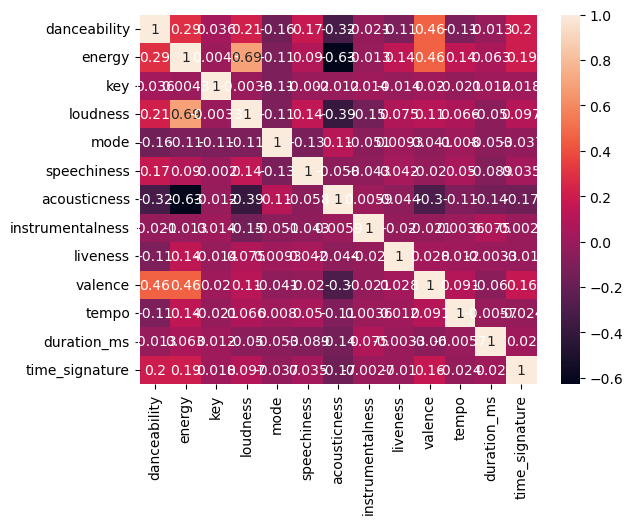

In [21]:
sns.heatmap(X.corr(),annot=True)   
plt.show()

In [22]:
X_prep = StandardScaler().fit_transform(X)
pd.DataFrame(X_prep).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.048010,-1.164375,-1.170572,-0.754985,-1.455198,3.008686,1.207538,-0.272170,0.453162,-0.627525,-0.618841,0.410915,0.199223
1,-1.274336,-1.428514,0.505541,0.120294,0.687192,-0.279435,1.157689,-0.272181,-0.296057,-1.489068,-0.890450,-1.031837,0.199223
2,0.030365,-0.817082,-0.053163,0.238568,-1.455198,-0.182031,0.990340,-0.272196,-0.422032,-1.532741,0.616193,-0.191502,3.587595
3,1.388319,-0.376850,-1.170572,0.157102,0.687192,2.669248,-1.051674,-0.271496,-0.269536,-1.572443,-0.831048,1.085178,0.199223
4,-1.287649,-1.350251,-1.170572,-1.082471,-1.455198,-0.122998,-0.213148,-0.272095,-0.422032,-1.890063,-1.277511,-0.409066,0.199223


In [23]:
K = range(2,20)
inertia =[]

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

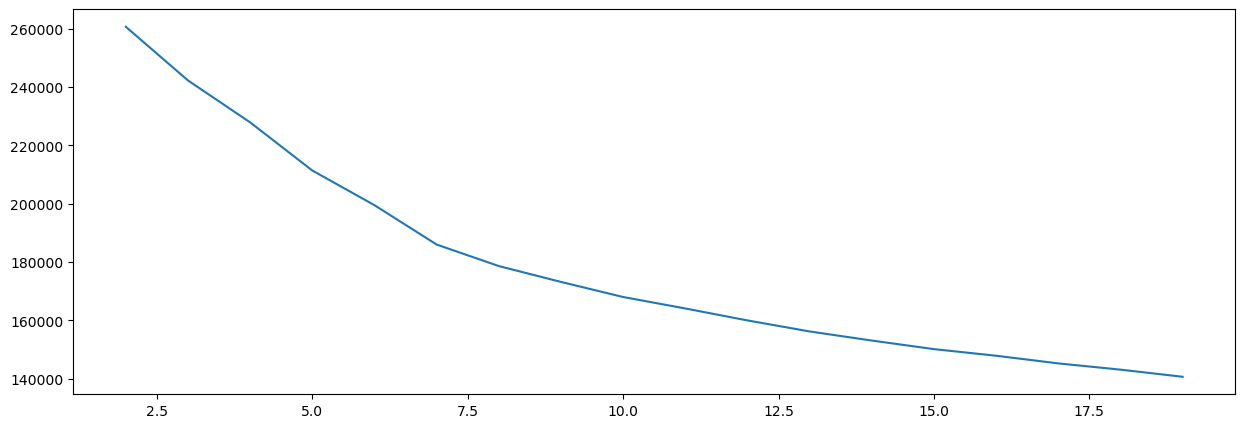

In [24]:
plt.figure(figsize=(15,5))  
plt.plot(K,inertia)         
plt.show() 

In [25]:
kmeans= KMeans(n_clusters=5,random_state=1234)  
kmeans.fit(X_prep)
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    5883
1    1319
2    5601
3    1266
4    9419
dtype: int64

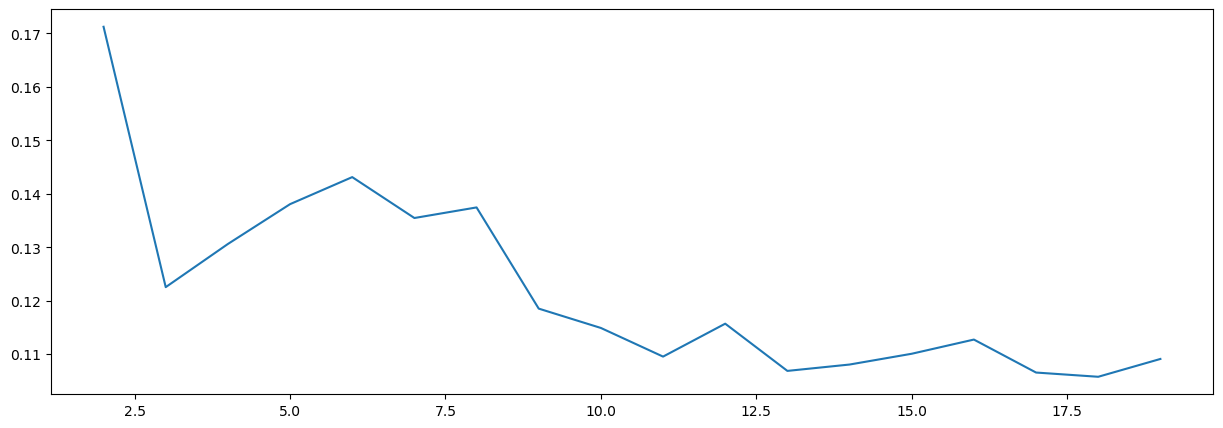

In [26]:
from sklearn.metrics import silhouette_score
K = range(2,20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep,kmeans.predict(X_prep)))
    
    
plt.figure(figsize=(15,5))
plt.plot(K,silhouette)
plt.show()

In [27]:
kmeans= KMeans(n_clusters=3,random_state=1234)  
kmeans.fit(X_prep)
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    10478
1     6358
2     6652
dtype: int64

In [28]:
# Chosen Model KMeans with 5 clusters

In [29]:
import pickle
from sklearn.preprocessing import StandardScaler

# Replace the StandardScaler by the scaler of your choice
scaler = StandardScaler()
scaler.fit(X)


scaler_filename = 'scaler_sd.pkl'
pickle.dump(scaler, open(scaler_filename, 'wb'))


X_prep = scaler.transform(X)

model = KMeans(n_clusters=5,random_state=1234)
#This will take some time, especially if you have lots of columns
model.fit(X_prep)

model_filename = 'KMeans.plk'

pickle.dump(model, open(model_filename, 'wb'))

In [30]:
kmeans= KMeans(n_clusters=5,random_state=1234)  
kmeans.fit(X_prep)
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    5883
1    1319
2    5601
3    1266
4    9419
dtype: int64

In [31]:
X_df= X
X_df['cluster'] = clusters
X_df

/var/folders/13/xty849950wj5f71_v7v6vysc0000gn/T/ipykernel_42513/3816861511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['cluster'] = clusters


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.450,0.352,1.0,-11.733,0.0,0.2670,0.6490,0.000004,0.2490,0.408,102.679,252747.0,4.0,3
1,0.416,0.298,7.0,-8.499,1.0,0.0442,0.6350,0.000002,0.1360,0.191,95.386,160173.0,4.0,0
2,0.612,0.423,5.0,-8.062,0.0,0.0508,0.5880,0.000000,0.1170,0.180,135.841,214093.0,5.0,0
3,0.816,0.513,1.0,-8.363,1.0,0.2440,0.0145,0.000102,0.1400,0.170,96.981,296011.0,4.0,3
4,0.414,0.314,1.0,-12.943,0.0,0.0548,0.2500,0.000015,0.1170,0.090,84.993,200133.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.621,0.513,5.0,-11.174,1.0,0.0511,0.4350,0.000002,0.2520,0.892,117.740,187973.0,4.0,4
23486,0.684,0.586,1.0,-14.119,1.0,0.0367,0.1310,0.000000,0.0378,0.896,128.534,200027.0,4.0,4
23487,0.517,0.617,0.0,-11.540,1.0,0.0359,0.1850,0.000001,0.1980,0.670,152.222,194347.0,4.0,4
23488,0.794,0.577,1.0,-9.190,1.0,0.0606,0.1760,0.000000,0.1170,0.876,124.255,175533.0,4.0,4


In [32]:
X_df.to_csv('numerical.csv')

In [33]:
playlist_clean = pd.read_csv('playlist_audio.csv',index_col=0)

In [34]:
playlist_clean

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,0
0,0.450,0.352,1.0,-11.733,0.0,0.2670,0.6490,0.000004,0.2490,0.408,102.679,audio_features,6oEVnWKgPqIEPc53OYDNqG,spotify:track:6oEVnWKgPqIEPc53OYDNqG,https://api.spotify.com/v1/tracks/6oEVnWKgPqIE...,https://api.spotify.com/v1/audio-analysis/6oEV...,252747.0,4.0,NaN
1,0.416,0.298,7.0,-8.499,1.0,0.0442,0.6350,0.000002,0.1360,0.191,95.386,audio_features,0Aa3g9EQoPNt6PiKjaUeb7,spotify:track:0Aa3g9EQoPNt6PiKjaUeb7,https://api.spotify.com/v1/tracks/0Aa3g9EQoPNt...,https://api.spotify.com/v1/audio-analysis/0Aa3...,160173.0,4.0,NaN
2,0.612,0.423,5.0,-8.062,0.0,0.0508,0.5880,0.000000,0.1170,0.180,135.841,audio_features,29he0Joo5sz2607A6ZBT6H,spotify:track:29he0Joo5sz2607A6ZBT6H,https://api.spotify.com/v1/tracks/29he0Joo5sz2...,https://api.spotify.com/v1/audio-analysis/29he...,214093.0,5.0,NaN
3,0.816,0.513,1.0,-8.363,1.0,0.2440,0.0145,0.000102,0.1400,0.170,96.981,audio_features,6MO2bfLHKykUgCChFdw91H,spotify:track:6MO2bfLHKykUgCChFdw91H,https://api.spotify.com/v1/tracks/6MO2bfLHKykU...,https://api.spotify.com/v1/audio-analysis/6MO2...,296011.0,4.0,NaN
4,0.414,0.314,1.0,-12.943,0.0,0.0548,0.2500,0.000015,0.1170,0.090,84.993,audio_features,3tZs3nVjySLbL320lP4mvs,spotify:track:3tZs3nVjySLbL320lP4mvs,https://api.spotify.com/v1/tracks/3tZs3nVjySLb...,https://api.spotify.com/v1/audio-analysis/3tZs...,200133.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.621,0.513,5.0,-11.174,1.0,0.0511,0.4350,0.000002,0.2520,0.892,117.740,audio_features,14KiXUcR7IDpvAhkTmqCuK,spotify:track:14KiXUcR7IDpvAhkTmqCuK,https://api.spotify.com/v1/tracks/14KiXUcR7IDp...,https://api.spotify.com/v1/audio-analysis/14Ki...,187973.0,4.0,NaN
23486,0.684,0.586,1.0,-14.119,1.0,0.0367,0.1310,0.000000,0.0378,0.896,128.534,audio_features,0mTvuMDJ3cDj0yw5j2wPEK,spotify:track:0mTvuMDJ3cDj0yw5j2wPEK,https://api.spotify.com/v1/tracks/0mTvuMDJ3cDj...,https://api.spotify.com/v1/audio-analysis/0mTv...,200027.0,4.0,NaN
23487,0.517,0.617,0.0,-11.540,1.0,0.0359,0.1850,0.000001,0.1980,0.670,152.222,audio_features,2asG1uvJTNu9pkTVBDL66A,spotify:track:2asG1uvJTNu9pkTVBDL66A,https://api.spotify.com/v1/tracks/2asG1uvJTNu9...,https://api.spotify.com/v1/audio-analysis/2asG...,194347.0,4.0,NaN
23488,0.794,0.577,1.0,-9.190,1.0,0.0606,0.1760,0.000000,0.1170,0.876,124.255,audio_features,0o5N7SG61e0EjnPFVx3QbL,spotify:track:0o5N7SG61e0EjnPFVx3QbL,https://api.spotify.com/v1/tracks/0o5N7SG61e0E...,https://api.spotify.com/v1/audio-analysis/0o5N...,175533.0,4.0,NaN


In [40]:
playlist_clean = playlist_clean.drop(playlist_clean.columns[-1], axis=1)

In [41]:
playlist_clean = pd.concat([data, playlist_clean], axis=1)

In [43]:
playlist_clean

,Song ID,Song Name,Artist Name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms
0,6oEVnWKgPqIEPc53OYDNqG,Could've Been (feat. Bryson Tiller),H.E.R.,0.450,0.352,1.0,-11.733,0.0,0.2670,0.6490,0.000004,0.2490,0.408,102.679,audio_features,6oEVnWKgPqIEPc53OYDNqG,spotify:track:6oEVnWKgPqIEPc53OYDNqG,https://api.spotify.com/v1/tracks/6oEVnWKgPqIE...,https://api.spotify.com/v1/audio-analysis/6oEV...,252747.0
1,0Aa3g9EQoPNt6PiKjaUeb7,Every Kind Of Way,H.E.R.,0.416,0.298,7.0,-8.499,1.0,0.0442,0.6350,0.000002,0.1360,0.191,95.386,audio_features,0Aa3g9EQoPNt6PiKjaUeb7,spotify:track:0Aa3g9EQoPNt6PiKjaUeb7,https://api.spotify.com/v1/tracks/0Aa3g9EQoPNt...,https://api.spotify.com/v1/audio-analysis/0Aa3...,160173.0
2,29he0Joo5sz2607A6ZBT6H,Come Through (feat. Chris Brown),H.E.R.,0.612,0.423,5.0,-8.062,0.0,0.0508,0.5880,0.000000,0.1170,0.180,135.841,audio_features,29he0Joo5sz2607A6ZBT6H,spotify:track:29he0Joo5sz2607A6ZBT6H,https://api.spotify.com/v1/tracks/29he0Joo5sz2...,https://api.spotify.com/v1/audio-analysis/29he...,214093.0
3,6MO2bfLHKykUgCChFdw91H,"Slide (Remix) (feat. Pop Smoke, A Boogie Wit d...",H.E.R.,0.816,0.513,1.0,-8.363,1.0,0.2440,0.0145,0.000102,0.1400,0.170,96.981,audio_features,6MO2bfLHKykUgCChFdw91H,spotify:track:6MO2bfLHKykUgCChFdw91H,https://api.spotify.com/v1/tracks/6MO2bfLHKykU...,https://api.spotify.com/v1/audio-analysis/6MO2...,296011.0
4,3tZs3nVjySLbL320lP4mvs,Focus,H.E.R.,0.414,0.314,1.0,-12.943,0.0,0.0548,0.2500,0.000015,0.1170,0.090,84.993,audio_features,3tZs3nVjySLbL320lP4mvs,spotify:track:3tZs3nVjySLbL320lP4mvs,https://api.spotify.com/v1/tracks/3tZs3nVjySLb...,https://api.spotify.com/v1/audio-analysis/3tZs...,200133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,14KiXUcR7IDpvAhkTmqCuK,Vaya Con Dios - Digitally Remastered 1998,Tony Orlando & Dawn,0.621,0.513,5.0,-11.174,1.0,0.0511,0.4350,0.000002,0.2520,0.892,117.740,audio_features,14KiXUcR7IDpvAhkTmqCuK,spotify:track:14KiXUcR7IDpvAhkTmqCuK,https://api.spotify.com/v1/tracks/14KiXUcR7IDp...,https://api.spotify.com/v1/audio-analysis/14Ki...,187973.0
23486,0mTvuMDJ3cDj0yw5j2wPEK,Candida,Tony Orlando & Dawn,0.684,0.586,1.0,-14.119,1.0,0.0367,0.1310,0.000000,0.0378,0.896,128.534,audio_features,0mTvuMDJ3cDj0yw5j2wPEK,spotify:track:0mTvuMDJ3cDj0yw5j2wPEK,https://api.spotify.com/v1/tracks/0mTvuMDJ3cDj...,https://api.spotify.com/v1/audio-analysis/0mTv...,200027.0
23487,2asG1uvJTNu9pkTVBDL66A,Mornin' Beautiful,Tony Orlando & Dawn,0.517,0.617,0.0,-11.540,1.0,0.0359,0.1850,0.000001,0.1980,0.670,152.222,audio_features,2asG1uvJTNu9pkTVBDL66A,spotify:track:2asG1uvJTNu9pkTVBDL66A,https://api.spotify.com/v1/tracks/2asG1uvJTNu9...,https://api.spotify.com/v1/audio-analysis/2asG...,194347.0
23488,0o5N7SG61e0EjnPFVx3QbL,Knock Three Times,Tony Orlando & Dawn,0.794,0.577,1.0,-9.190,1.0,0.0606,0.1760,0.000000,0.1170,0.876,124.255,audio_features,0o5N7SG61e0EjnPFVx3QbL,spotify:track:0o5N7SG61e0EjnPFVx3QbL,https://api.spotify.com/v1/tracks/0o5N7SG61e0E...,https://api.spotify.com/v1/audio-analysis/0o5N...,175533.0


In [44]:
playlist_clean = playlist_clean.dropna()

In [45]:
playlist_clean.isna().sum()

Song ID             0
Song Name           0
Artist Name         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
dtype: int64

In [46]:
playlist_clean

,Song ID,Song Name,Artist Name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms
0,6oEVnWKgPqIEPc53OYDNqG,Could've Been (feat. Bryson Tiller),H.E.R.,0.450,0.352,1.0,-11.733,0.0,0.2670,0.6490,0.000004,0.2490,0.408,102.679,audio_features,6oEVnWKgPqIEPc53OYDNqG,spotify:track:6oEVnWKgPqIEPc53OYDNqG,https://api.spotify.com/v1/tracks/6oEVnWKgPqIE...,https://api.spotify.com/v1/audio-analysis/6oEV...,252747.0
1,0Aa3g9EQoPNt6PiKjaUeb7,Every Kind Of Way,H.E.R.,0.416,0.298,7.0,-8.499,1.0,0.0442,0.6350,0.000002,0.1360,0.191,95.386,audio_features,0Aa3g9EQoPNt6PiKjaUeb7,spotify:track:0Aa3g9EQoPNt6PiKjaUeb7,https://api.spotify.com/v1/tracks/0Aa3g9EQoPNt...,https://api.spotify.com/v1/audio-analysis/0Aa3...,160173.0
2,29he0Joo5sz2607A6ZBT6H,Come Through (feat. Chris Brown),H.E.R.,0.612,0.423,5.0,-8.062,0.0,0.0508,0.5880,0.000000,0.1170,0.180,135.841,audio_features,29he0Joo5sz2607A6ZBT6H,spotify:track:29he0Joo5sz2607A6ZBT6H,https://api.spotify.com/v1/tracks/29he0Joo5sz2...,https://api.spotify.com/v1/audio-analysis/29he...,214093.0
3,6MO2bfLHKykUgCChFdw91H,"Slide (Remix) (feat. Pop Smoke, A Boogie Wit d...",H.E.R.,0.816,0.513,1.0,-8.363,1.0,0.2440,0.0145,0.000102,0.1400,0.170,96.981,audio_features,6MO2bfLHKykUgCChFdw91H,spotify:track:6MO2bfLHKykUgCChFdw91H,https://api.spotify.com/v1/tracks/6MO2bfLHKykU...,https://api.spotify.com/v1/audio-analysis/6MO2...,296011.0
4,3tZs3nVjySLbL320lP4mvs,Focus,H.E.R.,0.414,0.314,1.0,-12.943,0.0,0.0548,0.2500,0.000015,0.1170,0.090,84.993,audio_features,3tZs3nVjySLbL320lP4mvs,spotify:track:3tZs3nVjySLbL320lP4mvs,https://api.spotify.com/v1/tracks/3tZs3nVjySLb...,https://api.spotify.com/v1/audio-analysis/3tZs...,200133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,14KiXUcR7IDpvAhkTmqCuK,Vaya Con Dios - Digitally Remastered 1998,Tony Orlando & Dawn,0.621,0.513,5.0,-11.174,1.0,0.0511,0.4350,0.000002,0.2520,0.892,117.740,audio_features,14KiXUcR7IDpvAhkTmqCuK,spotify:track:14KiXUcR7IDpvAhkTmqCuK,https://api.spotify.com/v1/tracks/14KiXUcR7IDp...,https://api.spotify.com/v1/audio-analysis/14Ki...,187973.0
23486,0mTvuMDJ3cDj0yw5j2wPEK,Candida,Tony Orlando & Dawn,0.684,0.586,1.0,-14.119,1.0,0.0367,0.1310,0.000000,0.0378,0.896,128.534,audio_features,0mTvuMDJ3cDj0yw5j2wPEK,spotify:track:0mTvuMDJ3cDj0yw5j2wPEK,https://api.spotify.com/v1/tracks/0mTvuMDJ3cDj...,https://api.spotify.com/v1/audio-analysis/0mTv...,200027.0
23487,2asG1uvJTNu9pkTVBDL66A,Mornin' Beautiful,Tony Orlando & Dawn,0.517,0.617,0.0,-11.540,1.0,0.0359,0.1850,0.000001,0.1980,0.670,152.222,audio_features,2asG1uvJTNu9pkTVBDL66A,spotify:track:2asG1uvJTNu9pkTVBDL66A,https://api.spotify.com/v1/tracks/2asG1uvJTNu9...,https://api.spotify.com/v1/audio-analysis/2asG...,194347.0
23488,0o5N7SG61e0EjnPFVx3QbL,Knock Three Times,Tony Orlando & Dawn,0.794,0.577,1.0,-9.190,1.0,0.0606,0.1760,0.000000,0.1170,0.876,124.255,audio_features,0o5N7SG61e0EjnPFVx3QbL,spotify:track:0o5N7SG61e0EjnPFVx3QbL,https://api.spotify.com/v1/tracks/0o5N7SG61e0E...,https://api.spotify.com/v1/audio-analysis/0o5N...,175533.0


In [47]:
playlist_clean ['cluster'] = clusters

/var/folders/13/xty849950wj5f71_v7v6vysc0000gn/T/ipykernel_42513/1327340607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_clean ['cluster'] = clusters


In [48]:
playlist_clean

,Song ID,Song Name,Artist Name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,cluster
0,6oEVnWKgPqIEPc53OYDNqG,Could've Been (feat. Bryson Tiller),H.E.R.,0.450,0.352,1.0,-11.733,0.0,0.2670,0.6490,...,0.2490,0.408,102.679,audio_features,6oEVnWKgPqIEPc53OYDNqG,spotify:track:6oEVnWKgPqIEPc53OYDNqG,https://api.spotify.com/v1/tracks/6oEVnWKgPqIE...,https://api.spotify.com/v1/audio-analysis/6oEV...,252747.0,3
1,0Aa3g9EQoPNt6PiKjaUeb7,Every Kind Of Way,H.E.R.,0.416,0.298,7.0,-8.499,1.0,0.0442,0.6350,...,0.1360,0.191,95.386,audio_features,0Aa3g9EQoPNt6PiKjaUeb7,spotify:track:0Aa3g9EQoPNt6PiKjaUeb7,https://api.spotify.com/v1/tracks/0Aa3g9EQoPNt...,https://api.spotify.com/v1/audio-analysis/0Aa3...,160173.0,0
2,29he0Joo5sz2607A6ZBT6H,Come Through (feat. Chris Brown),H.E.R.,0.612,0.423,5.0,-8.062,0.0,0.0508,0.5880,...,0.1170,0.180,135.841,audio_features,29he0Joo5sz2607A6ZBT6H,spotify:track:29he0Joo5sz2607A6ZBT6H,https://api.spotify.com/v1/tracks/29he0Joo5sz2...,https://api.spotify.com/v1/audio-analysis/29he...,214093.0,0
3,6MO2bfLHKykUgCChFdw91H,"Slide (Remix) (feat. Pop Smoke, A Boogie Wit d...",H.E.R.,0.816,0.513,1.0,-8.363,1.0,0.2440,0.0145,...,0.1400,0.170,96.981,audio_features,6MO2bfLHKykUgCChFdw91H,spotify:track:6MO2bfLHKykUgCChFdw91H,https://api.spotify.com/v1/tracks/6MO2bfLHKykU...,https://api.spotify.com/v1/audio-analysis/6MO2...,296011.0,3
4,3tZs3nVjySLbL320lP4mvs,Focus,H.E.R.,0.414,0.314,1.0,-12.943,0.0,0.0548,0.2500,...,0.1170,0.090,84.993,audio_features,3tZs3nVjySLbL320lP4mvs,spotify:track:3tZs3nVjySLbL320lP4mvs,https://api.spotify.com/v1/tracks/3tZs3nVjySLb...,https://api.spotify.com/v1/audio-analysis/3tZs...,200133.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,14KiXUcR7IDpvAhkTmqCuK,Vaya Con Dios - Digitally Remastered 1998,Tony Orlando & Dawn,0.621,0.513,5.0,-11.174,1.0,0.0511,0.4350,...,0.2520,0.892,117.740,audio_features,14KiXUcR7IDpvAhkTmqCuK,spotify:track:14KiXUcR7IDpvAhkTmqCuK,https://api.spotify.com/v1/tracks/14KiXUcR7IDp...,https://api.spotify.com/v1/audio-analysis/14Ki...,187973.0,4
23486,0mTvuMDJ3cDj0yw5j2wPEK,Candida,Tony Orlando & Dawn,0.684,0.586,1.0,-14.119,1.0,0.0367,0.1310,...,0.0378,0.896,128.534,audio_features,0mTvuMDJ3cDj0yw5j2wPEK,spotify:track:0mTvuMDJ3cDj0yw5j2wPEK,https://api.spotify.com/v1/tracks/0mTvuMDJ3cDj...,https://api.spotify.com/v1/audio-analysis/0mTv...,200027.0,4
23487,2asG1uvJTNu9pkTVBDL66A,Mornin' Beautiful,Tony Orlando & Dawn,0.517,0.617,0.0,-11.540,1.0,0.0359,0.1850,...,0.1980,0.670,152.222,audio_features,2asG1uvJTNu9pkTVBDL66A,spotify:track:2asG1uvJTNu9pkTVBDL66A,https://api.spotify.com/v1/tracks/2asG1uvJTNu9...,https://api.spotify.com/v1/audio-analysis/2asG...,194347.0,4
23488,0o5N7SG61e0EjnPFVx3QbL,Knock Three Times,Tony Orlando & Dawn,0.794,0.577,1.0,-9.190,1.0,0.0606,0.1760,...,0.1170,0.876,124.255,audio_features,0o5N7SG61e0EjnPFVx3QbL,spotify:track:0o5N7SG61e0EjnPFVx3QbL,https://api.spotify.com/v1/tracks/0o5N7SG61e0E...,https://api.spotify.com/v1/audio-analysis/0o5N...,175533.0,4


In [49]:
 playlist_clean_2 = pd.concat([X_df, playlist_clean['Song Name']], axis=1)

In [50]:
playlist_clean_2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster,Song Name
0,0.450,0.352,1.0,-11.733,0.0,0.2670,0.6490,0.000004,0.2490,0.408,102.679,252747.0,4.0,3,Could've Been (feat. Bryson Tiller)
1,0.416,0.298,7.0,-8.499,1.0,0.0442,0.6350,0.000002,0.1360,0.191,95.386,160173.0,4.0,0,Every Kind Of Way
2,0.612,0.423,5.0,-8.062,0.0,0.0508,0.5880,0.000000,0.1170,0.180,135.841,214093.0,5.0,0,Come Through (feat. Chris Brown)
3,0.816,0.513,1.0,-8.363,1.0,0.2440,0.0145,0.000102,0.1400,0.170,96.981,296011.0,4.0,3,"Slide (Remix) (feat. Pop Smoke, A Boogie Wit d..."
4,0.414,0.314,1.0,-12.943,0.0,0.0548,0.2500,0.000015,0.1170,0.090,84.993,200133.0,4.0,0,Focus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.621,0.513,5.0,-11.174,1.0,0.0511,0.4350,0.000002,0.2520,0.892,117.740,187973.0,4.0,4,Vaya Con Dios - Digitally Remastered 1998
23486,0.684,0.586,1.0,-14.119,1.0,0.0367,0.1310,0.000000,0.0378,0.896,128.534,200027.0,4.0,4,Candida
23487,0.517,0.617,0.0,-11.540,1.0,0.0359,0.1850,0.000001,0.1980,0.670,152.222,194347.0,4.0,4,Mornin' Beautiful
23488,0.794,0.577,1.0,-9.190,1.0,0.0606,0.1760,0.000000,0.1170,0.876,124.255,175533.0,4.0,4,Knock Three Times


In [51]:
playlist_clean_2.to_csv('final_clean_df.csv')